Data Loading with Kaggle

In [ ]:
IMAGE_SIZE = 64
NR_OF_EPOCHS = 50

In [1]:
!pip install diffusers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 27.5 MB/s eta 0:00:00


In [2]:
import torch
from diffusers import DDPMPipeline

# We can set the device to either use our GPU or use our CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [3]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [4]:
!kaggle datasets download -d jhoward/lsun_bedroom

Dataset URL: https://www.kaggle.com/datasets/jhoward/lsun_bedroom
License(s): ODbL-1.0
100% 8.89G/8.89G [08:17<00:00, 23.5MB/s]
100% 8.89G/8.89G [08:17<00:00, 19.2MB/s]


In [5]:
!unzip lsun_bedroom

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: sample/data0/lsun/bedroom/f/b/d/fbd5fedec227994c1816b44f2ca9f3e82c6d7443.jpg  
  inflating: sample/data0/lsun/bedroom/f/b/d/fbd6160588fd3dc9e06b4288690d1d9ee0b541c6.jpg  
  inflating: sample/data0/lsun/bedroom/f/b/d/fbd6c84b1a3d3db0749222146c7fa4b5311f8d9f.jpg  
  inflating: sample/data0/lsun/bedroom/f/b/d/fbd6f96b894e3dedbcb629e7ed9f8f5b32b70581.jpg  
  inflating: sample/data0/lsun/bedroom/f/b/d/fbd713f5f784867f8e0d6eb45af0b24e2b98dcdd.jpg  
  inflating: sample/data0/lsun/bedroom/f/b/d/fbd7217f9d2fba8cea938a35c928741e361911fd.jpg  
  inflating: sample/data0/lsun/bedroom/f/b/d/fbd742d13cde6954f0a18564a91c8b901be140e2.jpg  
  inflating: sample/data0/lsun/bedroom/f/b/d/fbd7a210da182506c1cde48d7585bef758056f5d.jpg  
  inflating: sample/data0/lsun/bedroom/f/b/d/fbd7d7c87c4c622c539cab278cf0516fa666ec3f.jpg  
  inflating: sample/data0/lsun/bedroom/f/b/d/fbd80bb0e46e72b83870c182e14b0c1b8c2535ee.jpg  
  inflating: sa

In [6]:
import os
import shutil

# Define the source directory and the target directory
source_dir = '/content/data0/lsun/bedroom'
target_dir = '/content/training'

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Traverse through all subdirectories in the source directory
for root, dirs, files in os.walk(source_dir):
    print(f'Checking directory {root}...')
    for file in files:
        # If the file is an image, move it to the target directory
        if file.endswith('.jpg') or file.endswith('.png'):
            print(f'Moving file {file}...')
            shutil.move(os.path.join(root, file), target_dir)

# Create a zip archive of the target directory
#shutil.make_archive('/content/training_zipped', 'zip', target_dir)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
Moving file 4beb8759d72bdf0cab8baeca786a6ca6720b9eee.jpg...
Moving file 4be7696cbdffd8b1e2e3d6824dfd8cfaa9c85a6a.jpg...
Moving file 4be955304e326ebf8b72ac93cad6172468f341cd.jpg...
Moving file 4be5e60315d41f34804c89e891799102fdcc8652.jpg...
Moving file 4beabe7236e0e68b44a52bef31a1f369847e4f08.jpg...
Moving file 4beec6541d1258486cb5f6e47d4b0621b0c14380.jpg...
Moving file 4befbd0b8fc7108959fac8a2ed2c6630bbedbbbf.jpg...
Moving file 4bedb8d2f5a2b7e61eca41813f401860a1885578.jpg...
Moving file 4be52792f104d8f3ccefebc1f3314f715d88d707.jpg...
Moving file 4be9e52f24c71530dbd009b9f91ed5e98e09bfab.jpg...
Moving file 4be676eb95d0e862be30a104999566c63f6bc03f.jpg...
Moving file 4be4ae5f6edf9cdac91bc030602afc74e09b348c.jpg...
Moving file 4beb56592cd36725eb40227209c4d9f9c42d1c0b.jpg...
Moving file 4be36653dce999ef7a68bb4b27f1fdde4d432e6e.jpg...
Moving file 4bed07da93dac1d721ed58345a0a205a3e4c4423.jpg...
Moving file 4be54da65282e10025c75e0

In [7]:
import os
import shutil

# Define the source directory and the target directory
source_dir = '/content/training/'
target_dir = '/content/sample10000/'

# Create the target directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Initialize a counter for the number of images moved
count = 0

# Traverse through all subdirectories in the source directory
for root, dirs, files in os.walk(source_dir):
    for file in files:
        # If the file is an image, move it to the target directory
        if file.endswith('.jpg') or file.endswith('.png'):
            shutil.move(os.path.join(root, file), target_dir)
            count += 1
            # If we've moved 1000 images, stop
            if count >= 10000:
                break
    # If we've moved 1000 images, stop
    if count >= 10000:
        break

In [8]:
import os

DIR = '/content/sample10000'
print( len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

10000


Checking for small sample - 89 images

What data augemntataion we can apply, if that even will be changing

In [9]:
from torchvision import transforms

image_size = IMAGE_SIZE

# Define data augmentations
preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)),  # Resize
        transforms.RandomHorizontalFlip(),  # Randomly flip (data augmentation)
        transforms.ToTensor(),  # Convert to tensor (0, 1)
        transforms.Normalize([0.5], [0.5]),  # Map to (-1, 1)
    ]
)

In [10]:
from torch.utils.data import Dataset
from torchvision.transforms import Compose, ToTensor
from PIL import Image
import os

batch_size = 16


class CustomImageDataset(Dataset):
    def __init__(self, image_dir, transform=None):
        self.image_dir = image_dir
        self.image_filenames = os.listdir(image_dir)
        self.transform = transform

    def __len__(self):
        return len(self.image_filenames)

    def __getitem__(self, idx):
        image_path = os.path.join(self.image_dir, self.image_filenames[idx])
        image = Image.open(image_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image

# Define the directory where your images are stored
image_dir = '/content/sample10000'

# Define the transformation to preprocess images and convert them to tensors
transform = preprocess

# Load the images into a dataset
dataset = CustomImageDataset(image_dir, transform=transform)


train_dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True
)

In [11]:
#Check if images are loading correctly ADD displaying images
batch = next(iter(train_dataloader))

In [12]:
from diffusers import DDPMScheduler

# We'll learn about beta_start and beta_end in the next sections
scheduler = DDPMScheduler(
    num_train_timesteps=1000, beta_start=0.001, beta_end=0.02
)
timesteps = torch.linspace(0, 999, 8).long()

# We load 8 images from the dataset and
# add increasing amounts of noise to them
x = batch[:8]
noise = torch.rand_like(x)
noised_x = scheduler.add_noise(x, noise, timesteps)

In [13]:
noised_x

tensor([[[[-8.0727e-01, -8.3072e-01, -8.2239e-01,  ...,  8.9228e-01,
            9.0115e-01,  8.8969e-01],
          [-7.9209e-01, -8.2864e-01, -8.3726e-01,  ...,  9.0535e-01,
            9.2131e-01,  8.7571e-01],
          [-7.5246e-01, -8.4236e-01, -8.1491e-01,  ...,  9.2050e-01,
            9.0359e-01,  9.1938e-01],
          ...,
          [-6.4591e-02, -5.4622e-02, -7.9922e-02,  ...,  4.1992e-02,
            7.8561e-02,  9.7052e-02],
          [-1.0658e-01, -6.9457e-02, -2.3363e-03,  ...,  3.2390e-02,
            7.2050e-02,  6.7058e-02],
          [-7.3401e-02, -3.5321e-02,  2.2569e-02,  ...,  5.9056e-02,
            9.6801e-02,  8.1220e-02]],

         [[-9.4140e-01, -9.7522e-01, -9.6327e-01,  ...,  4.4966e-01,
            4.6080e-01,  4.6682e-01],
          [-8.9671e-01, -9.7576e-01, -9.5806e-01,  ...,  4.4844e-01,
            4.7306e-01,  4.7537e-01],
          [-9.0428e-01, -9.6670e-01, -9.6242e-01,  ...,  4.5770e-01,
            4.9721e-01,  4.8100e-01],
          ...,
     

In [14]:
import numpy as np
import matplotlib.pyplot as plt
def show_images(noised_x):
    noised_x = noised_x.detach().cpu().numpy()
    noised_x = np.transpose(noised_x, (0, 2, 3, 1))  # reshape from (batch, channels, height, width) to (batch, height, width, channels)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(np.concatenate([np.pad(img, ((2, 2), (2, 2), (0, 0)), mode='constant', constant_values=1)
                              for img in noised_x], axis=1))

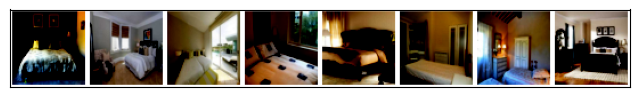

In [15]:
show_images(batch[:8])

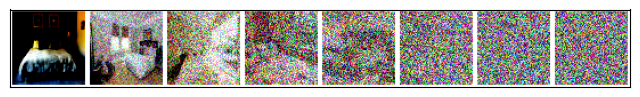

In [16]:
show_images(noised_x)

In [17]:
from diffusers import UNet2DModel

# Create a UNet2DModel
model = UNet2DModel(
    in_channels=3,  # 3 channels for RGB images
    sample_size=IMAGE_SIZE,  # Specify our input size
    # The number of channels per block affects the model size
    block_out_channels=(64, 128, 256, 512),
    down_block_types=(
        "DownBlock2D",
        "DownBlock2D",
        "AttnDownBlock2D",
        "AttnDownBlock2D",
    ),
    up_block_types=("AttnUpBlock2D", "AttnUpBlock2D", "UpBlock2D", "UpBlock2D"),
).to(device)

# Pass a batch of data through to see it works
with torch.no_grad():
    out = model(noised_x.to(device), timestep=timesteps.to(device)).sample

out.shape

torch.Size([8, 3, 64, 64])

In [18]:
from torch.nn import functional as F

num_epochs = NR_OF_EPOCHS  # How many runs through the data should we do?
lr = 1e-4  # What learning rate should we use
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
losses = []  # Somewhere to store the loss values for later plotting

# Train the model (this takes a while!)
for epoch in range(num_epochs):
    for batch in train_dataloader:
        # Load the input images
        clean_images = batch.to(device)

        # Sample noise to add to the images
        noise = torch.randn(clean_images.shape).to(device)

        # Sample a random timestep for each image
        timesteps = torch.randint(
            0,
            scheduler.config.num_train_timesteps,
            (clean_images.shape[0],),
            device=device,
        ).long()

        # Add noise to the clean images according
        # to the noise magnitude at each timestep
        noisy_images = scheduler.add_noise(clean_images, noise, timesteps)

        # Get the model prediction for the noise
        # The model also uses the timestep as an input
        # for additional conditioning
        noise_pred = model(noisy_images, timesteps, return_dict=False)[0]

        # Compare the prediction with the actual noise
        loss = F.mse_loss(noise_pred, noise)

        # Store the loss for later plotting
        losses.append(loss.item())

        # Update the model parameters with the optimizer based on this loss
        loss.backward(loss)
        optimizer.step()
        optimizer.zero_grad()

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


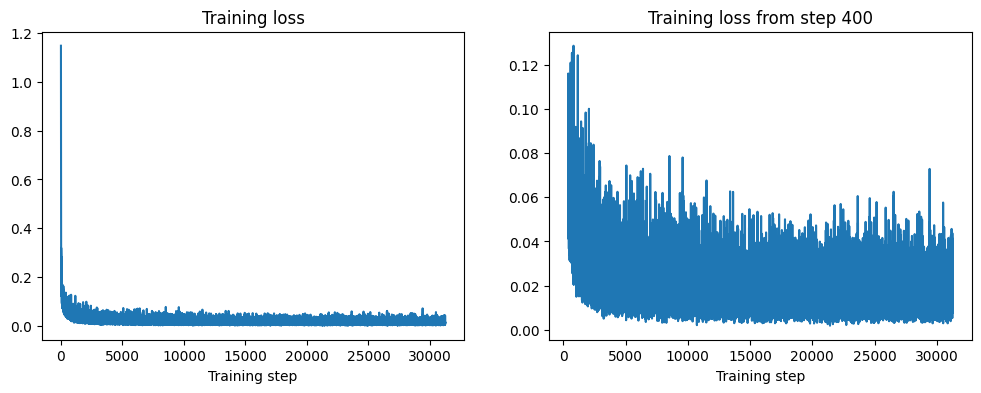

In [19]:
from matplotlib import pyplot as plt

plt.subplots(1, 2, figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Training loss")
plt.xlabel("Training step")

plt.subplot(1, 2, 2)
plt.plot(range(400, len(losses)), losses[400:])
plt.title("Training loss from step 400")
plt.xlabel("Training step");


In [20]:
pipeline = DDPMPipeline(unet=model, scheduler=scheduler)
ims = pipeline(batch_size=4).images
ims
#show_images(ims, nrows=1)

  0%|          | 0/1000 [00:00<?, ?it/s]

[<PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>,
 <PIL.Image.Image image mode=RGB size=64x64>]

In [21]:
import matplotlib.pyplot as plt

def show_images_PIL(images):
    fig, axs = plt.subplots(1, len(images), figsize=(20, 20))
    for i, img in enumerate(images):
        axs[i].imshow(img)
        axs[i].axis('off')

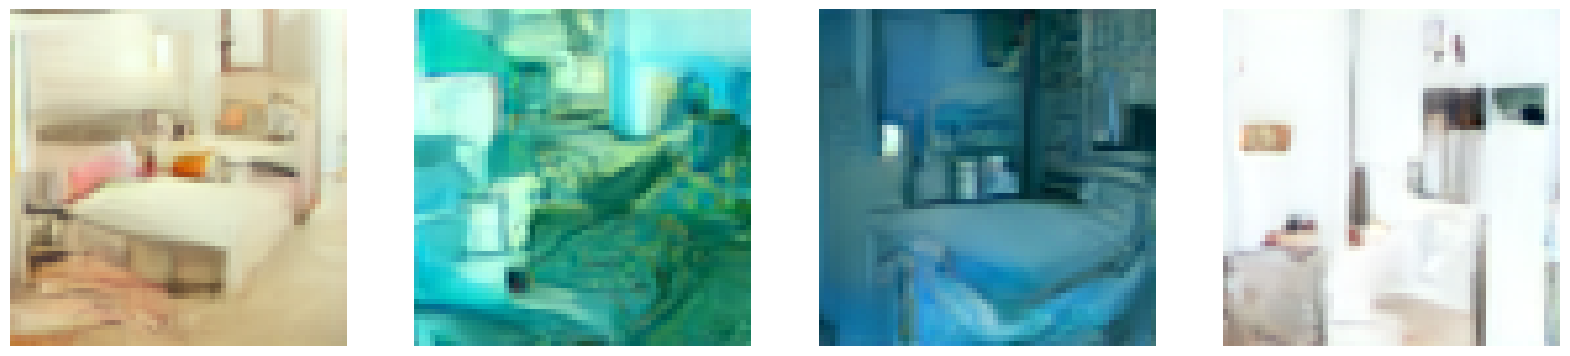

In [22]:
# Convert the tensors back to PIL Images
#images = [transforms.ToPILImage()(img) for img in ims]

# Display the images
show_images_PIL(ims)

In [27]:
torch.save(model.state_dict(), '/content/drive/MyDrive/Szkoła/Studia/model1.pt')